In [1]:
import pandas as pd


In [19]:
import pandas as pd

url = '../data/csv-theorique/'
agency = pd.read_csv(url + 'agency.csv', sep=';')
calendar = pd.read_csv(url + 'calendar.csv', sep=';')
calendar_dates = pd.read_csv(url + 'calendar_dates.csv', sep=';')
routes = pd.read_csv(url + 'routes.csv', sep=';')
stop_times = pd.read_csv(url + 'stop_times.csv', sep=';')
stops = pd.read_csv(url + 'stops.csv', sep=';')
trips = pd.read_csv(url + 'trips.csv', sep=';')

<Axes: xlabel='stop_id'>

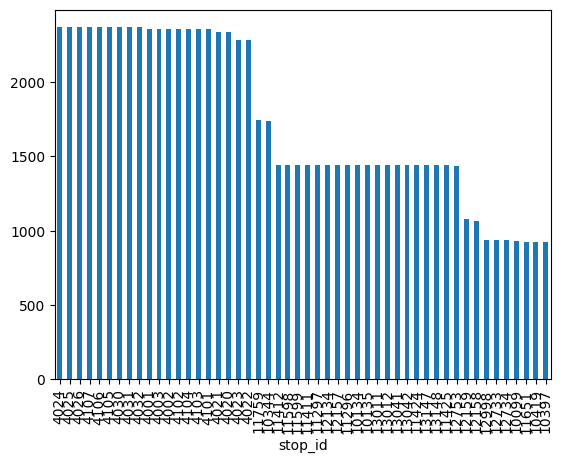

In [20]:
stop_times.groupby("stop_id")["stop_id"].size().sort_values(ascending=False).head(50).plot(kind="bar")

In [31]:
stop_times.arrival_time = pd.to_datetime(stop_times.arrival_time, format='%H:%M:%S')
stop_times.departure_time = pd.to_datetime(stop_times.departure_time, format='%H:%M:%S')

In [69]:
df = pd.merge(stop_times, trips[['trip_id', 'route_id', 'service_id', 'direction_id']], on='trip_id')
df

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,route_id,service_id,direction_id
0,0,1900-01-01 07:11:00,1900-01-01 07:11:00,12176,1,NaN,NaN,92,T23_RO-2-31,1
1,0,1900-01-01 07:13:00,1900-01-01 07:13:00,12175,2,NaN,NaN,92,T23_RO-2-31,1
2,0,1900-01-01 07:14:00,1900-01-01 07:14:00,11039,3,NaN,NaN,92,T23_RO-2-31,1
3,0,1900-01-01 07:15:00,1900-01-01 07:15:00,12173,4,NaN,NaN,92,T23_RO-2-31,1
4,0,1900-01-01 07:16:00,1900-01-01 07:16:00,11347,5,NaN,NaN,92,T23_RO-2-31,1
...,...,...,...,...,...,...,...,...,...,...
484191,9998,1900-01-01 18:18:00,1900-01-01 18:18:00,4104,4,NaN,NaN,402,ASCESC-2-127,0
484192,9999,1900-01-01 18:14:00,1900-01-01 18:14:00,4101,1,NaN,NaN,402,ASCESC-2-127,0
484193,9999,1900-01-01 18:15:00,1900-01-01 18:15:00,4102,2,NaN,NaN,402,ASCESC-2-127,0
484194,9999,1900-01-01 18:16:00,1900-01-01 18:16:00,4103,3,NaN,NaN,402,ASCESC-2-127,0


<Axes: xlabel='trip_id', ylabel='departure_time'>

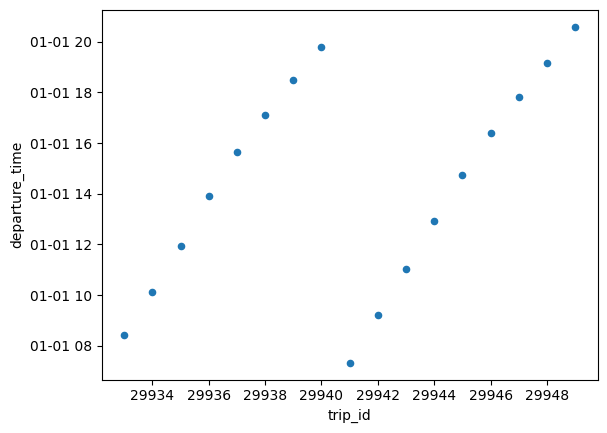

In [85]:


route = 14
service = "IST_M1-2-32"

df[(df.route_id == route) & (df.service_id == service) & (df.stop_sequence == 1) & (df.direction_id == 0)].sort_values(by='trip_id').plot(x='trip_id', y='departure_time', kind='scatter')